# Happiness Analysis

Authors: \
Baranovska Tetiana \
Lakoma Nadiia \
Zarichanska Yelyzaveta

In this application of econometrics, we decided to look into how different econometric approaches can help us to investigate the factors that impact the happiness rate across various countries over a period of time. The aim of this research is to identify and analyze the key determinants of happiness, focusing on variables such as GDP per capita, social support, freedom to make life choices, generosity, perception of corruption, and confidence in government.

Consider data in World Happiness Data.csv. \
The following variables are present in the data set:

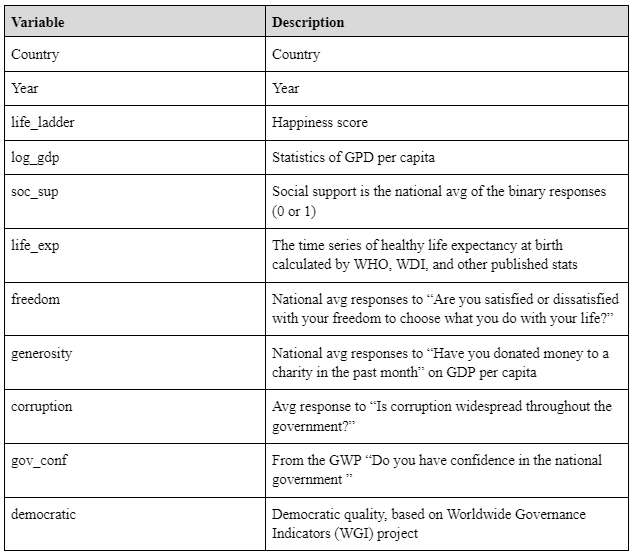

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import t
from sklearn.linear_model import LinearRegression
from numpy.ma.core import harden_mask

### Observing the ```life_ladder``` variable

First of all we want to compute the common location measures: mean, median, upper and lower quartiles, the upper and lower 5%-quantiles for the variable ```life_ladder```.

In [3]:
data = pd.read_csv('Happiness Data.csv', delimiter=';')
data.dropna()
ladder = data['life_ladder']
describtion = ladder.describe()
# print(ladder.describe())

print('Mean:', describtion[1] )
print('Median:', ladder.median() )
print('Lower quartile:', describtion[4])
print('Upper quartile:', describtion[6])
print('Lower 5%-quantile:', ladder.quantile(0.05))
print('Upper 5%-quantile:', ladder.quantile(0.95))

Mean: 5.428570701206338
Median: 5.3174397945
Lower quartile: 4.600383519999999
Upper quartile: 6.26986610925
Lower 5%-quantile: 3.7031017777
Upper 5%-quantile: 7.3823491333


Now we want to see a visualisation of distribution of a variable ```life_ladder```. \
Let us plot the histogram of ```life_ladder```.

Text(0, 0.5, 'Quantity')

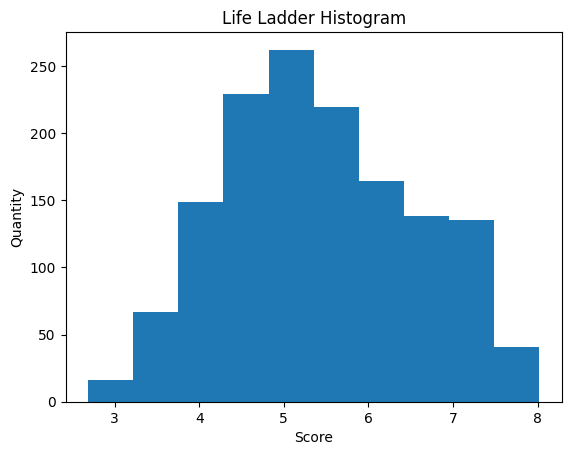

In [4]:
# ladder.hist()
plt.hist(ladder)
plt.title('Life Ladder Histogram')
plt.xlabel('Score')
plt.ylabel('Quantity')

Now let us observe a box-plot of the variable

<Axes: >

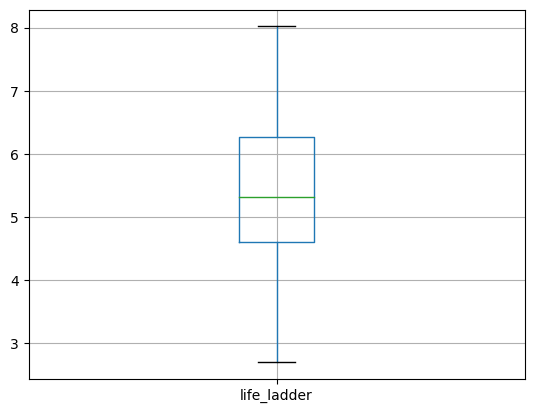

In [5]:
data.boxplot(column = 'life_ladder')

In [6]:
print("Skewness of Life Ladder:")
print(ladder.skew())

Skewness of Life Ladder:
0.14948982454412454


Conclusion:

As we can see the mean and median are 5.4 and 5.3 respectively, which is very close, however still not equal, that is why we can say that data is not symmetric, but very close to be symmetric.
Moreover, median is sligtly less than mean, that is why we can conclude that data is slightly right skewed (the tail of the distribution is longer on the right side). Moreover, we can confirm it with the computed skewness. The obtained result is 0.149, which is positive, but not big - this indicates that there is indeed a positive right skew.

### Correlation coefficients

Now we want to plot the scatter plots of 

```life_ladder``` vs. ```log_gdp```, 
 
```life_ladder``` vs. ```soc_sup```, 

```life_ladder``` vs. ```life_exp```, 

```life_ladder``` vs. ```freedom```, 

```life_ladder``` vs. ```generosity```, 

```life_ladder``` vs. ```corruption```, 

```life_ladder``` vs. ``` gov_conf```.

In [7]:
vars = ['life_ladder','log_gdp','soc_sup','life_exp','freedom','generosity','corruption','gov_conf', 'democratic']
corr_matrix = data[vars].corr()
matrix = corr_matrix.style.background_gradient(cmap='coolwarm')
matrix

,life_ladder,log_gdp,soc_sup,life_exp,freedom,generosity,corruption,gov_conf,democratic
life_ladder,1.000000,0.780555,0.694969,0.724329,0.526460,0.224718,-0.420490,-0.038558,0.607553
log_gdp,0.780555,1.000000,0.649018,0.833162,0.365248,0.000453,-0.346170,-0.104702,0.638864
soc_sup,0.694969,0.649018,1.000000,0.565728,0.427437,0.083127,-0.213136,-0.125724,0.542052
life_exp,0.724329,0.833162,0.565728,1.000000,0.332816,0.052083,-0.300385,-0.161699,0.592962
freedom,0.526460,0.365248,0.427437,0.332816,1.000000,0.364171,-0.500222,0.395280,0.469995
generosity,0.224718,0.000453,0.083127,0.052083,0.364171,1.000000,-0.291894,0.214845,0.146701
corruption,-0.420490,-0.346170,-0.213136,-0.300385,-0.500222,-0.291894,1.000000,-0.431565,-0.329500
gov_conf,-0.038558,-0.104702,-0.125724,-0.161699,0.395280,0.214845,-0.431565,1.000000,-0.065721
democratic,0.607553,0.638864,0.542052,0.592962,0.469995,0.146701,-0.329500,-0.065721,1.000000


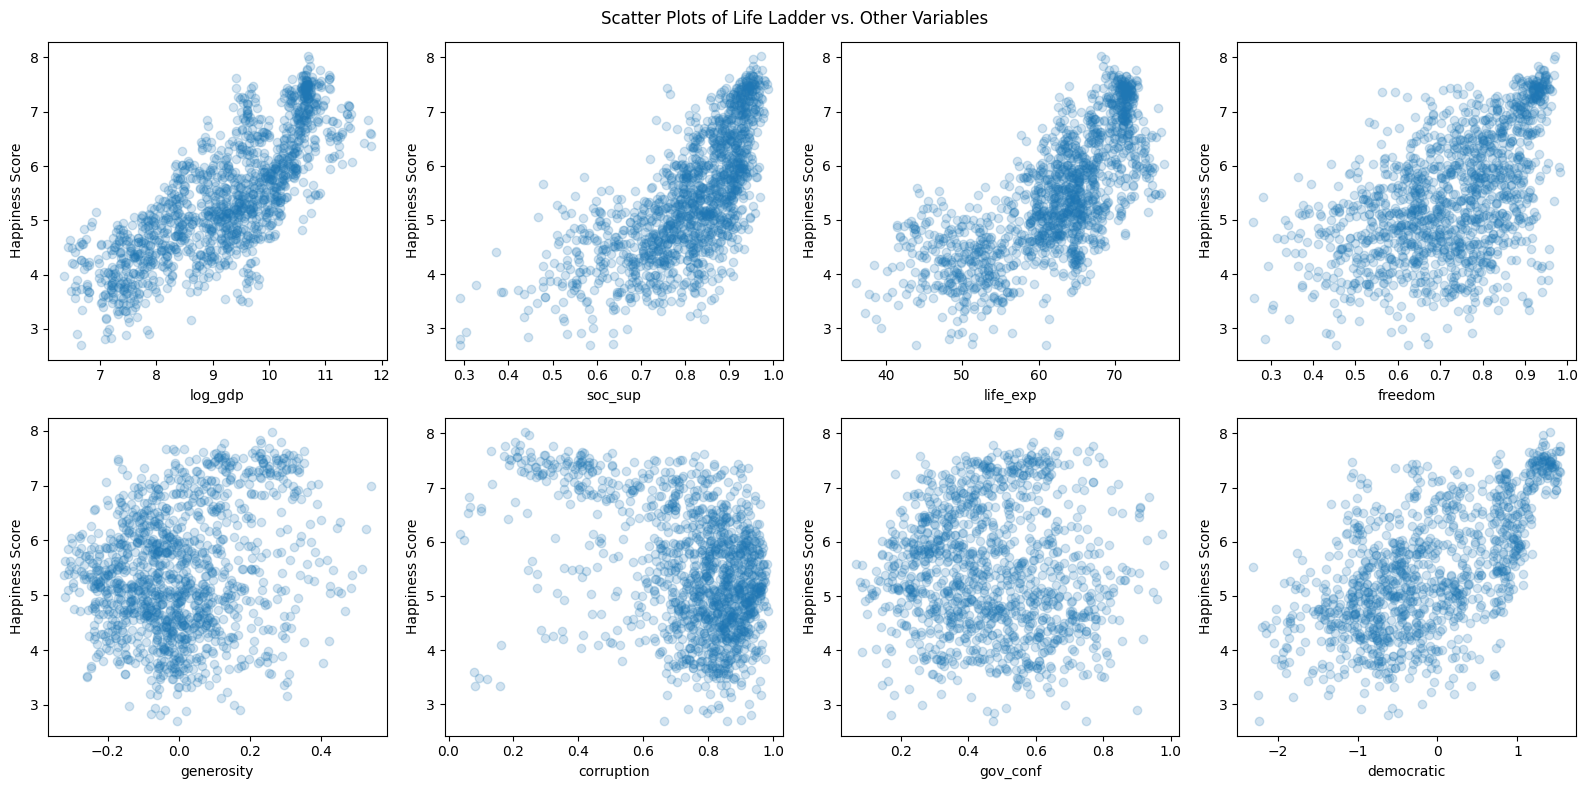

In [8]:
variables = ['log_gdp','soc_sup','life_exp','freedom','generosity','corruption','gov_conf', 'democratic']
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Scatter Plots of Life Ladder vs. Other Variables')
for i, variable in enumerate(variables):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(data[variable], ladder, alpha=0.2)
    axs[row, col].set_xlabel(variable)
    axs[row, col].set_ylabel('Happiness Score')
    
plt.tight_layout()
plt.show()

What we can conclude from this part?

* We can see that there is a positive and strong correlation between the happiness score and GDP per capita, indicating that higher GDP per capita leads to higher happiness score. The same for such variables as social support, healthy life expectancy at birth,freedom to make life choices and democratic quality.

* The correlation coefficient between life ladder and generosity is 0.2, which is positive, but relatively weak, indicating a weak positive linear association between these variables.

* Speaking about such factor as corruption, here is negative and strong correlation between happiness score and perceptions of corruption, which means that the higher corruption level throughout the government and businesses, the less is a happiness rate.

* The correlation coefficient between life ladder and confidence in national government is -0.04 is close to 0, indicating little or no linear association between the two variables.

### Linear Regression Model

First of all we have to replace NULL values with mean values of our observations. We do that to do not cut our obervations and have more accurate p-values.

In [9]:
data['log_gdp'] = data['log_gdp'].fillna((data['log_gdp'].mean()))
data.soc_sup  = data.soc_sup .fillna((data.soc_sup.mean()))
data.freedom = data.freedom.fillna((data.freedom.mean()))
data['life_exp'] = data['life_exp'].fillna((data['life_exp'].mean()))
data.generosity = data.generosity.fillna((data.generosity.mean()))
data.corruption = data.corruption.fillna((data.corruption.mean()))    
data.democratic = data.democratic.fillna((data.democratic.mean()))
data['gov_conf'] = data['gov_conf'].fillna((data['gov_conf'].mean()))                                   

Now we are going to construct a linear regression model for variable ```life_ladder``` taking other variables as independent variables:

In [10]:
mod = smf.ols(formula = 'life_ladder ~ log_gdp + soc_sup + life_exp + freedom + generosity + corruption + gov_conf + democratic', data = data)
mod = mod.fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:            life_ladder   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     502.8
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        16:09:39   Log-Likelihood:                -1220.3
No. Observations:                1420   AIC:                             2459.
Df Residuals:                    1411   BIC:                             2506.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4409      0.236     -6.100      0.0

Conclusions:

We know that a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.\
In the OLS Regression Results that we obtained, we can see that the predictor variables of ```log_gdp```,  ```soc_sup```, ```life_exp```, ```freedom```, ```generosity```, ```corruption```, ```gov_conf``` are significant, since their p-values are 0.000. However, the p-value for the variable ```democratic``` (0.607) is greater than the common alpha level of 0.05, which indicates that it is not statistically significant.\
This is why we can exclude the variable ```democratic``` from our OLS model to construct new regression model with more valid coefficients.

In [11]:
mod = smf.ols(formula = 'life_ladder ~ log_gdp + soc_sup + life_exp + freedom + generosity + corruption + gov_conf', data = data)
mod = mod.fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:            life_ladder   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     574.8
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        16:09:39   Log-Likelihood:                -1220.4
No. Observations:                1420   AIC:                             2457.
Df Residuals:                    1412   BIC:                             2499.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4897      0.216     -6.886      0.0

This will be our resulting OLS Regression model

What we can state from the obtained results?

Variables ```soc_sup```, ```freedom``` and ```generosity``` have the bigger coefficient, which means that such factors as social support, freedom of choise and generosity impact on peoples happiness score the most:

* The coefficient of variable ```soc_sup``` is equal to 2.4071. It means that people who have social support are more likely to have higher happiness score than those who do not have social support. And the difference in happiness score is equal to 2,4, which is significant.

* The coefficient of variable ```freedom``` is equal to 1.2155. It means that people who consider themselves to have a freedom of choise in their lives are happier that those who state that they do not have freedom. And the difference in happiness score is equal to 1,2, which is quite big.

* The coefficient of a variable ```generosity``` is equal to 0.8472. It means that society that is used to donating money for charity considers itself to be happier than those societies that do not donate. And the difference in happiness score is equal to 0,9 and it is quite depictive.

On the other hand, we have variables ```corruption``` and ```gov_conf```

* That was surprising for us to see that higher confidence in national governance leads to less happiness score and the difference in happines score is -0.4284.

* The coefficient of variable ```corruption``` is equal to -0.632. That means that societies that have high level of corruption widespread throughout the government and businesses have a less happiness score by 0,6 than those societies in which corruption is not widespread.

### Ukraine

We also tried to analyze these factors for the happiness score of Ukrainians, however, data includes only ten years (2006-2016) and does not take into consideration such political events as russian invasion and Crimean annexation, this is why the following results are not accurate enough and cannot depict the full picture of factors that impact the happiness score of Ukrainians.

In [12]:
df = data.loc[data['country'] == 'Ukraine']
df

,country,year,life_ladder,log_gdp,soc_sup,life_exp,freedom,generosity,corruption,positive_affect,negative_affect,gov_conf,democratic,delivery,st_dev,st_deviation_devided_mean
1305,Ukraine,2006,4.803954,8.967994,0.852453,60.406849,0.623814,-0.237415,0.929431,0.621520,0.249234,0.154709,-0.000739,-0.635599,1.972032,0.410502
1306,Ukraine,2007,5.252182,9.049996,0.820094,60.535187,0.493922,-0.221778,0.967940,0.636170,0.207652,0.078787,0.092545,-0.643666,1.981347,0.377243
1307,Ukraine,2008,5.172380,9.078151,0.860014,60.561157,0.486627,-0.246016,0.929175,0.573153,0.185806,0.159724,0.046296,-0.676567,1.974260,0.381693
1308,Ukraine,2009,5.165639,8.922421,0.845293,61.393940,0.460348,-0.221543,0.962244,0.583073,0.189014,0.086691,-0.140368,-0.785495,2.141061,0.414481
1309,Ukraine,2010,5.057561,8.967536,0.883555,62.348141,0.483833,-0.169380,0.953752,0.512683,0.227200,0.263287,-0.062019,-0.762537,1.743924,0.344815
1310,Ukraine,2011,5.083133,9.021824,0.859459,62.830757,0.578669,-0.208545,0.932535,0.590430,0.219648,0.236263,-0.104454,-0.809262,2.056055,0.404486
1311,Ukraine,2012,5.030342,9.026293,0.897573,62.950439,0.563650,-0.204050,0.896237,0.570338,0.192819,0.236936,-0.194139,-0.753959,1.977614,0.393137
1312,Ukraine,2013,4.710803,9.028570,0.896510,63.141537,0.568716,-0.197259,0.937324,0.643462,0.224596,0.189184,-0.541972,-0.801708,1.796963,0.381456
1313,Ukraine,2014,4.297330,9.016551,0.876760,63.165558,0.533267,0.102979,0.926789,0.594337,0.248560,0.242529,-1.004198,-0.696806,1.954745,0.454874
1314,Ukraine,2015,3.964543,8.915938,0.909440,63.189583,0.430592,-0.013423,0.952473,0.574076,0.241076,0.084304,-0.143355,NaN,1.956619,0.493530


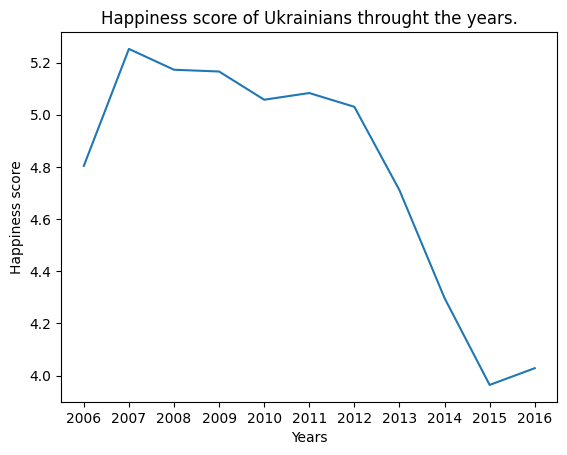

In [13]:
x = df['year']
y = df['life_ladder']
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, y)
plt.xticks(default_x_ticks, x)
plt.title('Happiness score of Ukrainians throught the years.')
plt.xlabel('Years')
plt.ylabel('Happiness score')
plt.show()

We cannot state that the correlation coefficients below are valid, again because in dataset the information and such factors as revolution, EU integration, russian invasion and Crimean annexation are not included, that is why data is not depictive. 

In [14]:
v = ['life_ladder','log_gdp','soc_sup','life_exp','freedom','generosity','corruption','gov_conf', 'democratic']
correlation_matrix = df[v].corr()
m = correlation_matrix.style.background_gradient(cmap='coolwarm')
m

,life_ladder,log_gdp,soc_sup,life_exp,freedom,generosity,corruption,gov_conf,democratic
life_ladder,1.000000,0.534661,-0.625506,-0.618023,0.179151,-0.869289,0.352691,0.152814,0.441382
log_gdp,0.534661,1.000000,-0.281574,-0.270855,0.355862,-0.379966,-0.066764,0.359453,-0.064410
soc_sup,-0.625506,-0.281574,1.000000,0.801859,-0.067019,0.463939,-0.443675,0.345262,-0.388131
life_exp,-0.618023,-0.270855,0.801859,1.000000,-0.033099,0.638218,-0.404852,0.396848,-0.588120
freedom,0.179151,0.355862,-0.067019,-0.033099,1.000000,-0.268973,-0.432353,0.494261,-0.171365
generosity,-0.869289,-0.379966,0.463939,0.638218,-0.268973,1.000000,-0.301340,0.038618,-0.631878
corruption,0.352691,-0.066764,-0.443675,-0.404852,-0.432353,-0.301340,1.000000,-0.365871,0.195917
gov_conf,0.152814,0.359453,0.345262,0.396848,0.494261,0.038618,-0.365871,1.000000,-0.412361
democratic,0.441382,-0.064410,-0.388131,-0.588120,-0.171365,-0.631878,0.195917,-0.412361,1.000000
